In [9]:
#导入xarray 模块
import xarray as xr
#直接使用xr.open_dataset读取nc文件即可
f1=xr.open_dataset("./data/rada/PRODUCT_RADR_CR_20220101001200.nc")
f1 #查看文件属性

<xarray.Dataset>
Dimensions:    (latitude: 1100, longitude: 1874)
Coordinates:
  * latitude   (latitude) float32 10.76 10.8 10.84 10.88 ... 54.64 54.68 54.72
  * longitude  (longitude) float32 65.64 65.68 65.72 65.76 ... 140.5 140.5 140.6
Data variables:
    CR         (latitude, longitude) float32 ...

In [10]:
#netCDF4来读取，使用netCDF4的Dataset方法读取文件，并把netCDF4文件对象赋值给变量file_obj
import numpy as np
import netCDF4 as nc
file_path = './data/rada/PRODUCT_RADR_CR_20220101001200.nc'
# 打开nc文件
file_obj = nc.Dataset(file_path)

In [11]:
# nc文件内有什么信息
file_obj

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): latitude(1100), longitude(1874)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 CR(latitude, longitude)
    groups: 

In [12]:
# nc文件内的变量信息
file_obj.variables.keys()

dict_keys(['latitude', 'longitude', 'CR'])

In [13]:
# 查看nc文件内CR这个变量的值
CR = file_obj.variables['CR']
print(CR)
print(CR.ncattrs())# 查看具体属性

<class 'netCDF4._netCDF4.Variable'>
float32 CR(latitude, longitude)
    grid_type: Latitude/longitude
    long_name: CR
    _FillValue: 9999.0
    units: 
    calByJava: 0
unlimited dimensions: 
current shape = (1100, 1874)
filling on
['grid_type', 'long_name', '_FillValue', 'units', 'calByJava']


In [14]:
CR_arr = CR[:]# 读取CR的数据值
print(CR_arr)
CR_arr.shape
type(CR_arr)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


numpy.ma.core.MaskedArray

In [15]:
from mpl_toolkits.basemap import  Basemap
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
lon_data = file_obj.variables['longitude'][:]
lat_data = file_obj.variables['latitude'][:]
CR_data = file_obj.variables['CR'][:]
# type(CR_data)
# type(lon_data)
print(lon_data.shape)
print(lat_data.shape)
print(CR_data.shape)
x,y = np.meshgrid(lon_data,lat_data)
print(x.shape)

(1874,)
(1100,)
(1100, 1874)
(1100, 1874)


In [16]:
np.vsplit(CR_data,2)

[masked_array(
   data=[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32)]

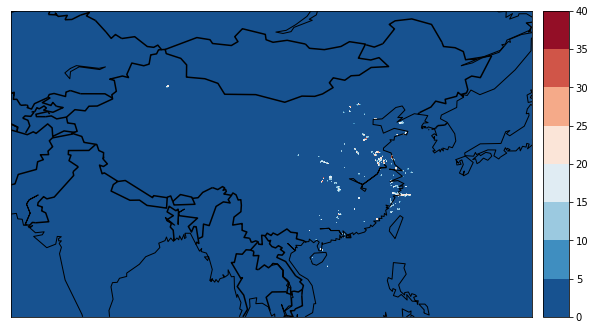

In [17]:
# 绘制图片
from mpl_toolkits.basemap import  Basemap
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

parallels = np.arange(lat_data[0],lat_data[1099],50)
meridians = np.arange(lon_data[0],lon_data[1873],50)
font = {'family':'serif',
        'weight':'normal',
        'size':40,
}
# picture
map = Basemap(llcrnrlon=65.64, llcrnrlat=10.76, urcrnrlon=140.56, urcrnrlat=54.72)
plt.figure(figsize=(10, 6))
x,y = np.meshgrid(lon_data,lat_data)
CS2 = map.contourf(x,y,CR_data,cmap=plt.cm.RdBu_r)
map.colorbar(CS2)

map.drawcountries(linewidth=1.5)
map.drawcoastlines()
plt.show()




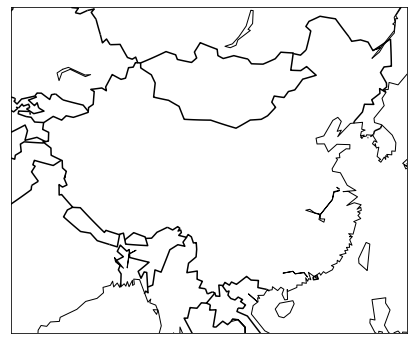

In [18]:
#example
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10, 6))
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# m = Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=53)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()
plt.show()